In [67]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import csv
import re
import copy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
listwitSB = []
with open('SangatBaik.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwitSB.append(row[0].split(';'))
listwitSB

[['INDOSAT', 'indosat mantap djaja koneksinya ngebut euy ', 'Sangat Baik'],
 ['XL',
  'Ini kenapa di bale endah sinyal XL tiba2 bagus yah? Pindah kali yah tower nya ke deket rumah.. *aneh liat hp sendiri ',
  'Sangat Baik'],
 ['TSEL',
  'Membalas @tsel_malang @tsel_malang iya min. Udah bisa kok. Hihihi. Tengkyu yaaaa :) seneng banget pake telkomsel. Sinyal lancaaar {} ',
  'Sangat Baik'],
 ['INDOSAT',
  '"@IndosatCare 30 ribu saya beneran atau bohongan saya coba buat internet lngsung tanpa daftar paket internet dan alhamdulillah bisa buat internet trus saya buka halaman indosat.. Baru kebuka saya dpt sms dari indosat ""Kamu internetan dg tarif perKBpemakai"',
  'Sangat Baik'],
 ['TSEL',
  'Membalas @Telkomsel mantap jiwa nih min harga paketnya ',
  'Sangat Baik'],
 ['TSEL',
  'Memang terBAIK sakali iye teh TELKOMSEL sehari semalam GSM wae .. ',
  'Sangat Baik'],
 ['XL',
  '17th pakai XLlancarcepat pulatp XL klo udah ngambek gak kira23 hari ini @myXL menyiksaku! Inet LemotSignal downVoi

In [3]:
listwitB = []
with open('Baik.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwitB.append(row[0].split(';'))
listwitB

[['TRI',
  'Hotsale 8GB hanya gratis nelfon aja ga ada gratis sms nya tah min? @triindonesia ',
  'Baik'],
 ['XL', 'Sinyal kencang XL mantabbbzz :D ', 'Baik'],
 ['INDOSAT',
  'yang lagi mau liburan di The Jungle Bogor Indosat Super WIFI juga ada di sana looh ngenet asik sambil liburan #Mantap @indosatbogor ',
  'Baik'],
 ['TRI',
  'Membalas @rapdodge @triindonesia Saya juga cukup heran mengapa BaikG 3 speednya bisa naik dirumah akan saya SS sisa paket saya semoga aja di sekolah cepat membaik (6) ',
  'Baik'],
 ['INDOSAT',
  'Terima kasih kepada sponsor yg sudah mendukung acara kita Indosat dan Nafigo. Sehingga acara kita dapat berjalan dengan lancar ? ',
  'Baik'],
 ['XL',
  'Ya ampun. Sinyal @myXL sangat kencang sekali. SampaiÂ² gak bisa MaBar Mobile Legend. Berjamaah pula. 55nya. XL. Lag semuah. Hebat. Tingkatkan lagi. ',
  'Baik'],
 ['XL', 'Sinyal xl kencang badai Youtube pun lancar maksimal ', 'Baik'],
 ['TRI',
  '@triindonesia sinyal Tri di area Cikarang delta mas dan Jababeka hil

In [4]:
listwitSTB = []
with open('SangatTidakBaik.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwitSTB.append(row[0].split(';'))
listwitSTB

[['INDOSAT',
  'Sinyal Indosat asu ari musim hujan hadeuh ',
  'Sangat Tidak Baik'],
 ['XL',
  'Membalas @myXL @Feriza07 woy @myXLCare anjing bukan dikota jakarya saja semua kota. apa lo gak baca twett pengguna lain? makasar aja uda seminggu. sialan lo anjing kampret ',
  'Sangat Tidak Baik'],
 ['TRI',
  '"-____- RT @DianSaaputra: Aseek.. ""NICK0MINAJ: Kalo hujan dan malam tri pasti lemot @triindonesia .. Bangsat"" "',
  'Sangat Tidak Baik'],
 ['TRI',
  'Frontal cuk :))RT @dwikyoutSIDers: Bangsatbbm+sms pending @triindonesia gatel! ',
  'Sangat Tidak Baik'],
 ['INDOSAT', 'Indosat sinyale koyo NGELEC.... Asu ', 'Sangat Tidak Baik'],
 ['TSEL',
  'Di tahun Anjing Tanah ini semoga semangat menggapai kesuksesan selalu hadir melengkapi kebahagiaan. Selamat Tahun Baru Imlek! ',
  'Sangat Tidak Baik'],
 ['TSEL',
  '#Im3 ne Iklan Sampah.. Kreatif dikit Napa.. Ikut2an As Telkomsel.. Maluuuuuuu.. ',
  'Sangat Tidak Baik'],
 ['TSEL',
  'monyeet koneksi sampah telkomsel nepu mulu dan gw mau aja dit

In [5]:
listwitTB = []
with open('TidakBaik.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwitTB.append(row[0].split(';'))
listwitTB

[['INDOSAT',
  'Membalas @IndosatCare @IndosatCare mau nangis deh rasanya pdahl saya percaya betul dengan indosat soal koneksi di wil Karimun tp sudah 3 hari koneksi kacau balau ',
  'Tidak Baik'],
 ['TRI',
  'Membalas @triindonesia Cek dm woi layananan keluhan semua ga berfungsi... ',
  'Tidak Baik'],
 ['TRI',
  'Membalas @andikapram_ @IndosatCare dan 2 lainnya Hai kak Andika Ada yang bisa saya bantu. Kami lihat akhir akhir ini anda sering sambat dengan kualitas jaringan dari @IndosatCare saya sarankan gunakan Paket Internet dari @Telkomsel agar anda tidak buang tenaga untuk marah marah. ',
  'Tidak Baik'],
 ['TRI',
  'JIKALAU MASALAH SDM YG MENGAKIBATKAN KELUHAN SAYA TIDAK DIBALAS COBALAH UNTUK MENAMBAH CS NYA LAGI @triindonesia Maulana Muldan menambahkan Maulana Muldan @UdanDanski Min balas dm saya @triindonesia',
  'Tidak Baik'],
 ['TRI',
  '@triindonesia operator 3 tolong yah sinyal nya jangan jelek terus tiap hari saya kecewa sekali dengan 3 sekarang.. padahal sdh 3tahun pakai ',

In [6]:
listwitN = []
with open('Netral.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwitN.append(row[0].split(';'))
listwitN

[['INDOSAT',
  '@indosatcare Kenapa kartu diregistrasi nggak bisa pak? Padahal nomor kk & ktp nya sudah benar? Sampai 5x gagal tolong di daftarkan segera demi kenyamanan pengguna kartu indosat. Terima kasih ',
  'Netral'],
 ['INDOSAT',
  '@IndosatCare tolong kasih penjelasan yg bisa saya terima dong.. kenapa 3 hari ini sinyal Indosat sangat mengecewakan di daerah Mampang Depok ',
  'Netral'],
 ['TRI',
  '@triindonesia gimana nichinternet untuk wilayah serang baru kok lambatbbm pending terusbuka facebook lamaterima kasih ',
  'Netral'],
 ['XL',
  'Haloo.. @myXL @myXLCare bagaimana nasib keluhan saya tiket C19Baik02752? Apakah masih di tanggapi atau di anggap angin lalu? Sejak Januari masih belum selesaikah? Cc : @YLKI_ID ',
  'Netral'],
 ['XL',
  '"Makassar lg seru banget nih guys sore ini ada event keren ""Celebes Jambore jeep"" & XL senang banget bs jd bagian dr event ini pastinya :) "',
  'Netral'],
 ['INDOSAT',
  '"@IndosatCare min jaringan indosat lemot bgt dan tolong jangan kasih 

In [7]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [8]:
for row in listwitSB:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwitSB

[['INDOSAT', 'indosat mantap djaja koneksinya ngebut euy ', 'Sangat Baik'],
 ['XL',
  'ini kenapa di bale endah sinyal xl tiba bagus yah pindah kali yah tower nya ke deket rumah aneh liat hp sendiri ',
  'Sangat Baik'],
 ['TSEL',
  'membalas iya min udah bisa kok hihihi tengkyu yaaaa seneng banget pake telkomsel sinyal lancaaar ',
  'Sangat Baik'],
 ['INDOSAT',
  ' ribu saya beneran atau bohongan saya coba buat internet lngsung tanpa daftar paket internet dan alhamdulillah bisa buat internet trus saya buka halaman indosat baru kebuka saya dpt sms dari indosat kamu internetan dg tarif perkbpemakai ',
  'Sangat Baik'],
 ['TSEL', 'membalas mantap jiwa nih min harga paketnya ', 'Sangat Baik'],
 ['TSEL',
  'memang terbaik sakali iye teh telkomsel sehari semalam gsm wae ',
  'Sangat Baik'],
 ['XL',
  'th pakai xllancarcepat pulatp xl klo udah ngambek gak kira hari ini menyiksaku inet lemotsignal downvoice angin anginan ',
  'Sangat Baik'],
 ['INDOSAT',
  'kebiasan pake indosat ngecek pulsa s

In [9]:
for row in listwitB:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwitB

[['TRI',
  'hotsale gb hanya gratis nelfon aja ga ada gratis sms nya tah min ',
  'Baik'],
 ['XL', 'sinyal kencang xl mantabbbzz ', 'Baik'],
 ['INDOSAT',
  'yang lagi mau liburan di the jungle bogor indosat super wifi juga ada di sana looh ngenet asik sambil liburan mantap ',
  'Baik'],
 ['TRI',
  'membalas saya juga cukup heran mengapa baikg speednya bisa naik dirumah akan saya ss sisa paket saya semoga aja di sekolah cepat membaik ',
  'Baik'],
 ['INDOSAT',
  'terima kasih kepada sponsor yg sudah mendukung acara kita indosat dan nafigo sehingga acara kita dapat berjalan dengan lancar ',
  'Baik'],
 ['XL',
  'ya ampun sinyal sangat kencang sekali sampai gak bisa mabar mobile legend berjamaah pula nya xl lag semuah hebat tingkatkan lagi ',
  'Baik'],
 ['XL', 'sinyal xl kencang badai youtube pun lancar maksimal ', 'Baik'],
 ['TRI',
  ' sinyal tri di area cikarang delta mas dan jababeka hilang sinyal mulai jam tadi mohon perbaikannya terima kasih ',
  'Baik'],
 ['XL',
  'ogah rt beraliha

In [10]:
for row in listwitN:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwitN

[['INDOSAT',
  ' kenapa kartu diregistrasi nggak bisa pak padahal nomor kk ktp nya sudah benar sampai gagal tolong di daftarkan segera demi kenyamanan pengguna kartu indosat terima kasih ',
  'Netral'],
 ['INDOSAT',
  ' tolong kasih penjelasan yg bisa saya terima dong kenapa hari ini sinyal indosat sangat mengecewakan di daerah mampang depok ',
  'Netral'],
 ['TRI',
  ' gimana nichinternet untuk wilayah serang baru kok lambatbbm pending terusbuka facebook lamaterima kasih ',
  'Netral'],
 ['XL',
  'haloo bagaimana nasib keluhan saya tiket cbaik apakah masih di tanggapi atau di anggap angin lalu sejak januari masih belum selesaikah cc ',
  'Netral'],
 ['XL',
  ' makassar lg seru banget nih guys sore ini ada event keren celebes jambore jeep xl senang banget bs jd bagian dr event ini pastinya ',
  'Netral'],
 ['INDOSAT',
  ' min jaringan indosat lemot bgt dan tolong jangan kasih solusi update jaringan manual lewat hp dan sejenisnya karena yang bermasalah kan bukan hpnya tapi indosatnya ja

In [11]:
for row in listwitTB:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwitTB

[['INDOSAT',
  'membalas mau nangis deh rasanya pdahl saya percaya betul dengan indosat soal koneksi di wil karimun tp sudah hari koneksi kacau balau ',
  'Tidak Baik'],
 ['TRI',
  'membalas cek dm woi layananan keluhan semua ga berfungsi ',
  'Tidak Baik'],
 ['TRI',
  'membalas dan lainnya hai kak andika ada yang bisa saya bantu kami lihat akhir akhir ini anda sering sambat dengan kualitas jaringan dari saya sarankan gunakan paket internet dari agar anda tidak buang tenaga untuk marah marah ',
  'Tidak Baik'],
 ['TRI',
  'jikalau masalah sdm yg mengakibatkan keluhan saya tidak dibalas cobalah untuk menambah cs nya lagi maulana muldan menambahkan maulana muldan min balas dm saya ',
  'Tidak Baik'],
 ['TRI',
  ' operator tolong yah sinyal nya jangan jelek terus tiap hari saya kecewa sekali dengan sekarang padahal sdh tahun pakai ',
  'Tidak Baik'],
 ['XL',
  ' sinyal dimana cuma padahal paket internet baikg makin mahal makin bobrok aja xl kecewa saiah ',
  'Tidak Baik'],
 ['INDOSAT',
  

In [12]:
for row in listwitSTB:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwitSTB

[['INDOSAT',
  'sinyal indosat asu ari musim hujan hadeuh ',
  'Sangat Tidak Baik'],
 ['XL',
  'membalas woy anjing bukan dikota jakarya saja semua kota apa lo gak baca twett pengguna lain makasar aja uda seminggu sialan lo anjing kampret ',
  'Sangat Tidak Baik'],
 ['TRI',
  ' ____ rt aseek nickminaj kalo hujan dan malam tri pasti lemot bangsat ',
  'Sangat Tidak Baik'],
 ['TRI', 'frontal cuk rt bangsatbbm sms pending gatel ', 'Sangat Tidak Baik'],
 ['INDOSAT', 'indosat sinyale koyo ngelec asu ', 'Sangat Tidak Baik'],
 ['TSEL',
  'di tahun anjing tanah ini semoga semangat menggapai kesuksesan selalu hadir melengkapi kebahagiaan selamat tahun baru imlek ',
  'Sangat Tidak Baik'],
 ['TSEL',
  'im ne iklan sampah kreatif dikit napa ikutan as telkomsel maluuuuuuu ',
  'Sangat Tidak Baik'],
 ['TSEL',
  'monyeet koneksi sampah telkomsel nepu mulu dan gw mau aja ditipu terus jadi yang bego siapa ',
  'Sangat Tidak Baik'],
 ['TSEL',
  ' anjing lukalau gk suka mobile legend jangan dilenotin do

In [13]:
lttokenSB = []
for i in listwitSB:
    i[1] = i[1].strip()
    lttokenSB.append([i[0], i[1].split(' '), i[2]])
lttokenSB

[['INDOSAT',
  ['indosat', 'mantap', 'djaja', 'koneksinya', 'ngebut', 'euy'],
  'Sangat Baik'],
 ['XL',
  ['ini',
   'kenapa',
   'di',
   'bale',
   'endah',
   'sinyal',
   'xl',
   'tiba',
   'bagus',
   'yah',
   'pindah',
   'kali',
   'yah',
   'tower',
   'nya',
   'ke',
   'deket',
   'rumah',
   'aneh',
   'liat',
   'hp',
   'sendiri'],
  'Sangat Baik'],
 ['TSEL',
  ['membalas',
   'iya',
   'min',
   'udah',
   'bisa',
   'kok',
   'hihihi',
   'tengkyu',
   'yaaaa',
   'seneng',
   'banget',
   'pake',
   'telkomsel',
   'sinyal',
   'lancaaar'],
  'Sangat Baik'],
 ['INDOSAT',
  ['ribu',
   'saya',
   'beneran',
   'atau',
   'bohongan',
   'saya',
   'coba',
   'buat',
   'internet',
   'lngsung',
   'tanpa',
   'daftar',
   'paket',
   'internet',
   'dan',
   'alhamdulillah',
   'bisa',
   'buat',
   'internet',
   'trus',
   'saya',
   'buka',
   'halaman',
   'indosat',
   'baru',
   'kebuka',
   'saya',
   'dpt',
   'sms',
   'dari',
   'indosat',
   'kamu',
   'inter

In [14]:
lttokenB = []
for i in listwitB:
    i[1] = i[1].strip()
    lttokenB.append([i[0], i[1].split(' '), i[2]])
lttokenB

[['TRI',
  ['hotsale',
   'gb',
   'hanya',
   'gratis',
   'nelfon',
   'aja',
   'ga',
   'ada',
   'gratis',
   'sms',
   'nya',
   'tah',
   'min'],
  'Baik'],
 ['XL', ['sinyal', 'kencang', 'xl', 'mantabbbzz'], 'Baik'],
 ['INDOSAT',
  ['yang',
   'lagi',
   'mau',
   'liburan',
   'di',
   'the',
   'jungle',
   'bogor',
   'indosat',
   'super',
   'wifi',
   'juga',
   'ada',
   'di',
   'sana',
   'looh',
   'ngenet',
   'asik',
   'sambil',
   'liburan',
   'mantap'],
  'Baik'],
 ['TRI',
  ['membalas',
   'saya',
   'juga',
   'cukup',
   'heran',
   'mengapa',
   'baikg',
   'speednya',
   'bisa',
   'naik',
   'dirumah',
   'akan',
   'saya',
   'ss',
   'sisa',
   'paket',
   'saya',
   'semoga',
   'aja',
   'di',
   'sekolah',
   'cepat',
   'membaik'],
  'Baik'],
 ['INDOSAT',
  ['terima',
   'kasih',
   'kepada',
   'sponsor',
   'yg',
   'sudah',
   'mendukung',
   'acara',
   'kita',
   'indosat',
   'dan',
   'nafigo',
   'sehingga',
   'acara',
   'kita',
   'dapat',


In [15]:
lttokenN = []
for i in listwitN:
    i[1] = i[1].strip()
    lttokenN.append([i[0], i[1].split(' '), i[2]])
lttokenN

[['INDOSAT',
  ['kenapa',
   'kartu',
   'diregistrasi',
   'nggak',
   'bisa',
   'pak',
   'padahal',
   'nomor',
   'kk',
   'ktp',
   'nya',
   'sudah',
   'benar',
   'sampai',
   'gagal',
   'tolong',
   'di',
   'daftarkan',
   'segera',
   'demi',
   'kenyamanan',
   'pengguna',
   'kartu',
   'indosat',
   'terima',
   'kasih'],
  'Netral'],
 ['INDOSAT',
  ['tolong',
   'kasih',
   'penjelasan',
   'yg',
   'bisa',
   'saya',
   'terima',
   'dong',
   'kenapa',
   'hari',
   'ini',
   'sinyal',
   'indosat',
   'sangat',
   'mengecewakan',
   'di',
   'daerah',
   'mampang',
   'depok'],
  'Netral'],
 ['TRI',
  ['gimana',
   'nichinternet',
   'untuk',
   'wilayah',
   'serang',
   'baru',
   'kok',
   'lambatbbm',
   'pending',
   'terusbuka',
   'facebook',
   'lamaterima',
   'kasih'],
  'Netral'],
 ['XL',
  ['haloo',
   'bagaimana',
   'nasib',
   'keluhan',
   'saya',
   'tiket',
   'cbaik',
   'apakah',
   'masih',
   'di',
   'tanggapi',
   'atau',
   'di',
   'anggap'

In [16]:
lttokenTB = []
for i in listwitTB:
    i[1] = i[1].strip()
    lttokenTB.append([i[0], i[1].split(' '), i[2]])
lttokenTB

[['INDOSAT',
  ['membalas',
   'mau',
   'nangis',
   'deh',
   'rasanya',
   'pdahl',
   'saya',
   'percaya',
   'betul',
   'dengan',
   'indosat',
   'soal',
   'koneksi',
   'di',
   'wil',
   'karimun',
   'tp',
   'sudah',
   'hari',
   'koneksi',
   'kacau',
   'balau'],
  'Tidak Baik'],
 ['TRI',
  ['membalas',
   'cek',
   'dm',
   'woi',
   'layananan',
   'keluhan',
   'semua',
   'ga',
   'berfungsi'],
  'Tidak Baik'],
 ['TRI',
  ['membalas',
   'dan',
   'lainnya',
   'hai',
   'kak',
   'andika',
   'ada',
   'yang',
   'bisa',
   'saya',
   'bantu',
   'kami',
   'lihat',
   'akhir',
   'akhir',
   'ini',
   'anda',
   'sering',
   'sambat',
   'dengan',
   'kualitas',
   'jaringan',
   'dari',
   'saya',
   'sarankan',
   'gunakan',
   'paket',
   'internet',
   'dari',
   'agar',
   'anda',
   'tidak',
   'buang',
   'tenaga',
   'untuk',
   'marah',
   'marah'],
  'Tidak Baik'],
 ['TRI',
  ['jikalau',
   'masalah',
   'sdm',
   'yg',
   'mengakibatkan',
   'keluhan',


In [17]:
lttokenSTB = []
for i in listwitSTB:
    i[1] = i[1].strip()
    lttokenSTB.append([i[0], i[1].split(' '), i[2]])
lttokenSTB

[['INDOSAT',
  ['sinyal', 'indosat', 'asu', 'ari', 'musim', 'hujan', 'hadeuh'],
  'Sangat Tidak Baik'],
 ['XL',
  ['membalas',
   'woy',
   'anjing',
   'bukan',
   'dikota',
   'jakarya',
   'saja',
   'semua',
   'kota',
   'apa',
   'lo',
   'gak',
   'baca',
   'twett',
   'pengguna',
   'lain',
   'makasar',
   'aja',
   'uda',
   'seminggu',
   'sialan',
   'lo',
   'anjing',
   'kampret'],
  'Sangat Tidak Baik'],
 ['TRI',
  ['____',
   'rt',
   'aseek',
   'nickminaj',
   'kalo',
   'hujan',
   'dan',
   'malam',
   'tri',
   'pasti',
   'lemot',
   'bangsat'],
  'Sangat Tidak Baik'],
 ['TRI',
  ['frontal', 'cuk', 'rt', 'bangsatbbm', 'sms', 'pending', 'gatel'],
  'Sangat Tidak Baik'],
 ['INDOSAT',
  ['indosat', 'sinyale', 'koyo', 'ngelec', 'asu'],
  'Sangat Tidak Baik'],
 ['TSEL',
  ['di',
   'tahun',
   'anjing',
   'tanah',
   'ini',
   'semoga',
   'semangat',
   'menggapai',
   'kesuksesan',
   'selalu',
   'hadir',
   'melengkapi',
   'kebahagiaan',
   'selamat',
   'tahun'

In [18]:
sw_li = ['sih', 
         'dong', 
         'gue', 
         'lu', 
         'nya', 
         'rt', 
         'di', 
         'itu', 
         'saya', 
         'indosat', 
         'telkomsel', 
         'xl', 
         'dan', 
         'yang', 
         'yg', 
         'gb', 
         'aku',
         'tri',
         'ya',
         'ini',
         'ada',
         'ke',
         'aja',
         'nih',
         'sy',
         'gue',
         'dgn',
         'dari',
        ]

In [40]:
stopwordN = []
for i in lttokenN:
    temp = []
    for j in i[1]:
        if not j in sw_li:
            temp.append(j)
    stopwordN.append(temp)
stopwordN

[['kenapa',
  'kartu',
  'diregistrasi',
  'nggak',
  'bisa',
  'pak',
  'padahal',
  'nomor',
  'kk',
  'ktp',
  'sudah',
  'benar',
  'sampai',
  'gagal',
  'tolong',
  'daftarkan',
  'segera',
  'demi',
  'kenyamanan',
  'pengguna',
  'kartu',
  'terima',
  'kasih'],
 ['tolong',
  'kasih',
  'penjelasan',
  'bisa',
  'terima',
  'kenapa',
  'hari',
  'sinyal',
  'sangat',
  'mengecewakan',
  'daerah',
  'mampang',
  'depok'],
 ['gimana',
  'nichinternet',
  'untuk',
  'wilayah',
  'serang',
  'baru',
  'kok',
  'lambatbbm',
  'pending',
  'terusbuka',
  'facebook',
  'lamaterima',
  'kasih'],
 ['haloo',
  'bagaimana',
  'nasib',
  'keluhan',
  'tiket',
  'cbaik',
  'apakah',
  'masih',
  'tanggapi',
  'atau',
  'anggap',
  'angin',
  'lalu',
  'sejak',
  'januari',
  'masih',
  'belum',
  'selesaikah',
  'cc'],
 ['makassar',
  'lg',
  'seru',
  'banget',
  'guys',
  'sore',
  'event',
  'keren',
  'celebes',
  'jambore',
  'jeep',
  'senang',
  'banget',
  'bs',
  'jd',
  'bagian',


In [39]:
stopwordTB = []
for i in lttokenTB:
    temp = []
    for j in i[1]:
        if not j in sw_li:
            temp.append(j)
    stopwordTB.append(temp)
stopwordTB

[['membalas',
  'mau',
  'nangis',
  'deh',
  'rasanya',
  'pdahl',
  'percaya',
  'betul',
  'dengan',
  'soal',
  'koneksi',
  'wil',
  'karimun',
  'tp',
  'sudah',
  'hari',
  'koneksi',
  'kacau',
  'balau'],
 ['membalas',
  'cek',
  'dm',
  'woi',
  'layananan',
  'keluhan',
  'semua',
  'ga',
  'berfungsi'],
 ['membalas',
  'lainnya',
  'hai',
  'kak',
  'andika',
  'bisa',
  'bantu',
  'kami',
  'lihat',
  'akhir',
  'akhir',
  'anda',
  'sering',
  'sambat',
  'dengan',
  'kualitas',
  'jaringan',
  'sarankan',
  'gunakan',
  'paket',
  'internet',
  'agar',
  'anda',
  'tidak',
  'buang',
  'tenaga',
  'untuk',
  'marah',
  'marah'],
 ['jikalau',
  'masalah',
  'sdm',
  'mengakibatkan',
  'keluhan',
  'tidak',
  'dibalas',
  'cobalah',
  'untuk',
  'menambah',
  'cs',
  'lagi',
  'maulana',
  'muldan',
  'menambahkan',
  'maulana',
  'muldan',
  'min',
  'balas',
  'dm'],
 ['operator',
  'tolong',
  'yah',
  'sinyal',
  'jangan',
  'jelek',
  'terus',
  'tiap',
  'hari',
  'k

In [38]:
stopwordSB = []
for i in lttokenSB:
    temp = []
    for j in i[1]:
        if not j in sw_li:
            temp.append(j)
    stopwordSB.append(temp)
stopwordSB

[['mantap', 'djaja', 'koneksinya', 'ngebut', 'euy'],
 ['kenapa',
  'bale',
  'endah',
  'sinyal',
  'tiba',
  'bagus',
  'yah',
  'pindah',
  'kali',
  'yah',
  'tower',
  'deket',
  'rumah',
  'aneh',
  'liat',
  'hp',
  'sendiri'],
 ['membalas',
  'iya',
  'min',
  'udah',
  'bisa',
  'kok',
  'hihihi',
  'tengkyu',
  'yaaaa',
  'seneng',
  'banget',
  'pake',
  'sinyal',
  'lancaaar'],
 ['ribu',
  'beneran',
  'atau',
  'bohongan',
  'coba',
  'buat',
  'internet',
  'lngsung',
  'tanpa',
  'daftar',
  'paket',
  'internet',
  'alhamdulillah',
  'bisa',
  'buat',
  'internet',
  'trus',
  'buka',
  'halaman',
  'baru',
  'kebuka',
  'dpt',
  'sms',
  'kamu',
  'internetan',
  'dg',
  'tarif',
  'perkbpemakai'],
 ['membalas', 'mantap', 'jiwa', 'min', 'harga', 'paketnya'],
 ['memang',
  'terbaik',
  'sakali',
  'iye',
  'teh',
  'sehari',
  'semalam',
  'gsm',
  'wae'],
 ['th',
  'pakai',
  'xllancarcepat',
  'pulatp',
  'klo',
  'udah',
  'ngambek',
  'gak',
  'kira',
  'hari',
  'me

In [37]:
stopwordB = []
for i in lttokenB:
    temp = []
    for j in i[1]:
        if not j in sw_li:
            temp.append(j)
    stopwordB.append(temp)
stopwordB

[['hotsale', 'hanya', 'gratis', 'nelfon', 'ga', 'gratis', 'sms', 'tah', 'min'],
 ['sinyal', 'kencang', 'mantabbbzz'],
 ['lagi',
  'mau',
  'liburan',
  'the',
  'jungle',
  'bogor',
  'super',
  'wifi',
  'juga',
  'sana',
  'looh',
  'ngenet',
  'asik',
  'sambil',
  'liburan',
  'mantap'],
 ['membalas',
  'juga',
  'cukup',
  'heran',
  'mengapa',
  'baikg',
  'speednya',
  'bisa',
  'naik',
  'dirumah',
  'akan',
  'ss',
  'sisa',
  'paket',
  'semoga',
  'sekolah',
  'cepat',
  'membaik'],
 ['terima',
  'kasih',
  'kepada',
  'sponsor',
  'sudah',
  'mendukung',
  'acara',
  'kita',
  'nafigo',
  'sehingga',
  'acara',
  'kita',
  'dapat',
  'berjalan',
  'dengan',
  'lancar'],
 ['ampun',
  'sinyal',
  'sangat',
  'kencang',
  'sekali',
  'sampai',
  'gak',
  'bisa',
  'mabar',
  'mobile',
  'legend',
  'berjamaah',
  'pula',
  'lag',
  'semuah',
  'hebat',
  'tingkatkan',
  'lagi'],
 ['sinyal', 'kencang', 'badai', 'youtube', 'pun', 'lancar', 'maksimal'],
 ['sinyal',
  'area',
  'c

In [36]:
stopwordSTB = []
for i in lttokenSTB:
    temp = []
    for j in i[1]:
        if not j in sw_li:
            temp.append(j)
    stopwordSTB.append(temp)
stopwordSTB

[['sinyal', 'asu', 'ari', 'musim', 'hujan', 'hadeuh'],
 ['membalas',
  'woy',
  'anjing',
  'bukan',
  'dikota',
  'jakarya',
  'saja',
  'semua',
  'kota',
  'apa',
  'lo',
  'gak',
  'baca',
  'twett',
  'pengguna',
  'lain',
  'makasar',
  'uda',
  'seminggu',
  'sialan',
  'lo',
  'anjing',
  'kampret'],
 ['____',
  'aseek',
  'nickminaj',
  'kalo',
  'hujan',
  'malam',
  'pasti',
  'lemot',
  'bangsat'],
 ['frontal', 'cuk', 'bangsatbbm', 'sms', 'pending', 'gatel'],
 ['sinyale', 'koyo', 'ngelec', 'asu'],
 ['tahun',
  'anjing',
  'tanah',
  'semoga',
  'semangat',
  'menggapai',
  'kesuksesan',
  'selalu',
  'hadir',
  'melengkapi',
  'kebahagiaan',
  'selamat',
  'tahun',
  'baru',
  'imlek'],
 ['im',
  'ne',
  'iklan',
  'sampah',
  'kreatif',
  'dikit',
  'napa',
  'ikutan',
  'as',
  'maluuuuuuu'],
 ['monyeet',
  'koneksi',
  'sampah',
  'nepu',
  'mulu',
  'gw',
  'mau',
  'ditipu',
  'terus',
  'jadi',
  'bego',
  'siapa'],
 ['anjing',
  'lukalau',
  'gk',
  'suka',
  'mobile

In [41]:
ltstemSB = []
for i in stopwordSB:
    temp_sentence = []
    for j in i:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    ltstemSB.append(temp_sentence)
ltstemSB

[['mantap', 'djaja', 'koneksi', 'ngebut', 'euy'],
 ['kenapa',
  'bale',
  'endah',
  'sinyal',
  'tiba',
  'bagus',
  'yah',
  'pindah',
  'kali',
  'yah',
  'tower',
  'deket',
  'rumah',
  'aneh',
  'liat',
  'hp',
  'sendiri'],
 ['balas',
  'iya',
  'min',
  'udah',
  'bisa',
  'kok',
  'hihihi',
  'tengkyu',
  'yaaaa',
  'neng',
  'banget',
  'pake',
  'sinyal',
  'lancaaar'],
 ['ribu',
  'beneran',
  'atau',
  'bohong',
  'coba',
  'buat',
  'internet',
  'lngsung',
  'tanpa',
  'daftar',
  'paket',
  'internet',
  'alhamdulillah',
  'bisa',
  'buat',
  'internet',
  'trus',
  'buka',
  'halaman',
  'baru',
  'buka',
  'dpt',
  'sms',
  'kamu',
  'internetan',
  'dg',
  'tarif',
  'perkbpemakai'],
 ['balas', 'mantap', 'jiwa', 'min', 'harga', 'paket'],
 ['memang', 'baik', 'sakal', 'iye', 'teh', 'hari', 'malam', 'gsm', 'wae'],
 ['th',
  'pakai',
  'xllancarcepat',
  'pulatp',
  'klo',
  'udah',
  'ngambek',
  'gak',
  'kira',
  'hari',
  'siksa',
  'inet',
  'lemotsignal',
  'downvo

In [42]:
ltstemB = []
for i in stopwordB:
    temp_sentence = []
    for j in i:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    ltstemB.append(temp_sentence)
ltstemB

[['hotsale', 'hanya', 'gratis', 'nelfon', 'ga', 'gratis', 'sms', 'tah', 'min'],
 ['sinyal', 'kencang', 'mantabbbzz'],
 ['lagi',
  'mau',
  'libur',
  'the',
  'jungle',
  'bogor',
  'super',
  'wifi',
  'juga',
  'sana',
  'looh',
  'ngenet',
  'asik',
  'sambil',
  'libur',
  'mantap'],
 ['balas',
  'juga',
  'cukup',
  'heran',
  'mengapa',
  'baikg',
  'speednya',
  'bisa',
  'naik',
  'rumah',
  'akan',
  'ss',
  'sisa',
  'paket',
  'moga',
  'sekolah',
  'cepat',
  'baik'],
 ['terima',
  'kasih',
  'kepada',
  'sponsor',
  'sudah',
  'dukung',
  'acara',
  'kita',
  'nafigo',
  'sehingga',
  'acara',
  'kita',
  'dapat',
  'jalan',
  'dengan',
  'lancar'],
 ['ampun',
  'sinyal',
  'sangat',
  'kencang',
  'sekali',
  'sampai',
  'gak',
  'bisa',
  'mabar',
  'mobile',
  'legend',
  'jamaah',
  'pula',
  'lag',
  'semuah',
  'hebat',
  'tingkat',
  'lagi'],
 ['sinyal', 'kencang', 'badai', 'youtube', 'pun', 'lancar', 'maksimal'],
 ['sinyal',
  'area',
  'cikarang',
  'delta',
  'ma

In [43]:
ltstemSTB = []
for i in stopwordSTB:
    temp_sentence = []
    for j in i:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    ltstemSTB.append(temp_sentence)
ltstemSTB

[['sinyal', 'asu', 'ari', 'musim', 'hujan', 'hadeuh'],
 ['balas',
  'woy',
  'anjing',
  'bukan',
  'kota',
  'jakarya',
  'saja',
  'semua',
  'kota',
  'apa',
  'lo',
  'gak',
  'baca',
  'twett',
  'guna',
  'lain',
  'makasar',
  'uda',
  'minggu',
  'sial',
  'lo',
  'anjing',
  'kampret'],
 ['',
  'aseek',
  'nickminaj',
  'kalo',
  'hujan',
  'malam',
  'pasti',
  'lot',
  'bangsat'],
 ['frontal', 'cuk', 'bangsatbbm', 'sms', 'pending', 'gatel'],
 ['sinyale', 'koyo', 'ngelec', 'asu'],
 ['tahun',
  'anjing',
  'tanah',
  'moga',
  'semangat',
  'gapai',
  'sukses',
  'selalu',
  'hadir',
  'lengkap',
  'bahagia',
  'selamat',
  'tahun',
  'baru',
  'imlek'],
 ['im',
  'ne',
  'iklan',
  'sampah',
  'kreatif',
  'dikit',
  'napa',
  'ikut',
  'as',
  'maluuuuuuu'],
 ['monyeet',
  'koneksi',
  'sampah',
  'nepu',
  'mulu',
  'gw',
  'mau',
  'tipu',
  'terus',
  'jadi',
  'bego',
  'siapa'],
 ['anjing',
  'lukalau',
  'gk',
  'suka',
  'mobile',
  'legend',
  'jangan',
  'dilenotin'

In [44]:
ltstemTB = []
for i in stopwordTB:
    temp_sentence = []
    for j in i:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    ltstemTB.append(temp_sentence)
ltstemTB

[['balas',
  'mau',
  'nang',
  'deh',
  'rasa',
  'pdahl',
  'percaya',
  'betul',
  'dengan',
  'soal',
  'koneksi',
  'wil',
  'karimun',
  'tp',
  'sudah',
  'hari',
  'koneksi',
  'kacau',
  'balau'],
 ['balas', 'cek', 'dm', 'woi', 'layananan', 'keluh', 'semua', 'ga', 'fungsi'],
 ['balas',
  'lain',
  'hai',
  'kak',
  'andika',
  'bisa',
  'bantu',
  'kami',
  'lihat',
  'akhir',
  'akhir',
  'anda',
  'sering',
  'sambat',
  'dengan',
  'kualitas',
  'jaring',
  'saran',
  'guna',
  'paket',
  'internet',
  'agar',
  'anda',
  'tidak',
  'buang',
  'tenaga',
  'untuk',
  'marah',
  'marah'],
 ['jikalau',
  'masalah',
  'sdm',
  'akibat',
  'keluh',
  'tidak',
  'balas',
  'coba',
  'untuk',
  'tambah',
  'cs',
  'lagi',
  'maulana',
  'muldan',
  'tambah',
  'maulana',
  'muldan',
  'min',
  'balas',
  'dm'],
 ['operator',
  'tolong',
  'yah',
  'sinyal',
  'jangan',
  'jelek',
  'terus',
  'tiap',
  'hari',
  'kecewa',
  'sekali',
  'dengan',
  'sekarang',
  'padahal',
  'sdh',

In [45]:
ltstemN = []
for i in stopwordN:
    temp_sentence = []
    for j in i:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    ltstemN.append(temp_sentence)
ltstemN

[['kenapa',
  'kartu',
  'registrasi',
  'nggak',
  'bisa',
  'pak',
  'padahal',
  'nomor',
  'kk',
  'ktp',
  'sudah',
  'benar',
  'sampai',
  'gagal',
  'tolong',
  'daftar',
  'segera',
  'demi',
  'nyaman',
  'guna',
  'kartu',
  'terima',
  'kasih'],
 ['tolong',
  'kasih',
  'jelas',
  'bisa',
  'terima',
  'kenapa',
  'hari',
  'sinyal',
  'sangat',
  'kecewa',
  'daerah',
  'mampang',
  'depok'],
 ['gimana',
  'nichinternet',
  'untuk',
  'wilayah',
  'serang',
  'baru',
  'kok',
  'lambatbbm',
  'pending',
  'terusbuka',
  'facebook',
  'lamaterima',
  'kasih'],
 ['haloo',
  'bagaimana',
  'nasib',
  'keluh',
  'tiket',
  'cbaik',
  'apakah',
  'masih',
  'tanggap',
  'atau',
  'anggap',
  'angin',
  'lalu',
  'sejak',
  'januari',
  'masih',
  'belum',
  'selesai',
  'cc'],
 ['makassar',
  'lg',
  'seru',
  'banget',
  'guys',
  'sore',
  'event',
  'keren',
  'celebes',
  'jambore',
  'jeep',
  'senang',
  'banget',
  'bs',
  'jd',
  'bagi',
  'dr',
  'event',
  'pasti'],
 

In [46]:
a = []
for i in ltstemSB:
    for j in i:
        a.append(j)
for i in ltstemB:
    for j in i:
        a.append(j)
for i in ltstemN:
    for j in i:
        a.append(j)
for i in ltstemTB:
    for j in i:
        a.append(j)
for i in ltstemSTB:
    for j in i:
        a.append(j)

In [47]:
print(a)

['mantap', 'djaja', 'koneksi', 'ngebut', 'euy', 'kenapa', 'bale', 'endah', 'sinyal', 'tiba', 'bagus', 'yah', 'pindah', 'kali', 'yah', 'tower', 'deket', 'rumah', 'aneh', 'liat', 'hp', 'sendiri', 'balas', 'iya', 'min', 'udah', 'bisa', 'kok', 'hihihi', 'tengkyu', 'yaaaa', 'neng', 'banget', 'pake', 'sinyal', 'lancaaar', 'ribu', 'beneran', 'atau', 'bohong', 'coba', 'buat', 'internet', 'lngsung', 'tanpa', 'daftar', 'paket', 'internet', 'alhamdulillah', 'bisa', 'buat', 'internet', 'trus', 'buka', 'halaman', 'baru', 'buka', 'dpt', 'sms', 'kamu', 'internetan', 'dg', 'tarif', 'perkbpemakai', 'balas', 'mantap', 'jiwa', 'min', 'harga', 'paket', 'memang', 'baik', 'sakal', 'iye', 'teh', 'hari', 'malam', 'gsm', 'wae', 'th', 'pakai', 'xllancarcepat', 'pulatp', 'klo', 'udah', 'ngambek', 'gak', 'kira', 'hari', 'siksa', 'inet', 'lemotsignal', 'downvoice', 'angin', 'angin', 'bias', 'pake', 'ngecek', 'pulsa', 'salahtapi', 'makasih', 'telkomselinternet', 'mu', 'cepat', 'sekali', 'alhamdulillah', 'kartu', 'p

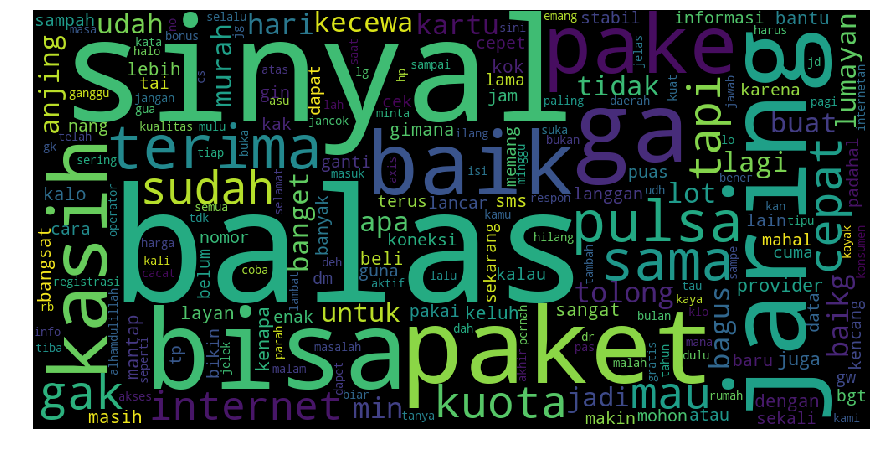

In [68]:
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [48]:
b = []
for i in a:
    if not(i in b):
        b.append(i)

In [49]:
print (len(b))
print (len(a))

15757
169542


In [50]:
c = {}
for i in b:
    c[i]=0

In [51]:
counterSB = copy.copy(c)
counterB = copy.copy(c)
counterN = copy.copy(c)
counterTB = copy.copy(c)
counterSTB = copy.copy(c)

In [52]:
for i in ltstemSB:
    for j in i:
       counterSB[j] += 1
for i in ltstemB:
    for j in i:
       counterB[j] += 1 
for i in ltstemN:
    for j in i:
       counterN[j] += 1
for i in ltstemTB:
    for j in i:
       counterTB[j] += 1 
for i in ltstemSTB:
    for j in i:
       counterSTB[j] += 1 

In [64]:
all_dict = {}
all_dict['Sangat Baik']=counterSB
all_dict['Baik']=counterB
all_dict['Netral']=counterN
all_dict['Tidak Baik']=counterTB
all_dict['Sangat Tidak Baik']=counterSTB
df = pd.DataFrame(data=all_dict)
# df.sort_values(by=['Netral'], ascending= False)
df.assign(mean=df.mean(axis=1)).sort_values('mean', ascending=False)

Baik  Netral  Sangat Baik  Sangat Tidak Baik  Tidak Baik   mean
balas         598     804          609                777         702  698.0
sinyal        947     241          670                429         538  565.0
jaring        149     267          281                410         418  305.0
bisa          225     619          220                178         277  303.8
paket         352     328          194                169         305  269.6
ga            210     239          169                257         314  237.8
baik           85     303          505                 97         195  237.0
pake          420      86          244                146         270  233.2
kasih         142     685          223                 20          74  228.8
terima        135     626          213                  9          62  209.0
pulsa         152     296          147                214         190  199.8
sama          153     220          133                143         327  195.2
gak           160     191          131                217         272  194.2
cepat         246      84          412                 12         197  190.2
sudah         104     400          153                 59         199  183.0
tapi          227     228           99                114         241  181.8
kuota         160     273          105                134         200  174.4
mau           137     297           79                120         228  172.2
internet      180     193          169                105         209  171.2
tolong         24     593           26                 45         165  170.6
min           113     437           77                 51         171  169.8
hari          153     215          136                131         214  169.8
baikg         153     169          153                161         206  168.4
udah          109     185          110                169         232  161.0
murah         586      14           93                 24          67  156.8
tidak          42     407           78                 58         195  156.0
kecewa          9      23           13                 19         715  155.8
banget        123      76          208                146         217  154.0
anjing          0       0            0                766           1  153.4
lagi          131     156          135                130         213  153.0
...           ...     ...          ...                ...         ...    ...
kadu            0       0            0                  0           1    0.2
kadut           0       0            1                  0           0    0.2
kaesekei        0       0            0                  0           1    0.2
kaetu           0       0            0                  1           0    0.2
kafilah         0       0            0                  1           0    0.2
kagaindosat     1       0            0                  0           0    0.2
kabul           0       0            1                  0           0    0.2
kabtulang       0       0            0                  0           1    0.2
kabkerinci      0       1            0                  0           0    0.2
kabinet         0       0            0                  1           0    0.2
juuuaaara       0       0            1                  0           0    0.2
juwata          1       0            0                  0           0    0.2
jw              1       0            0                  0           0    0.2
jwab            0       0            0                  1           0    0.2
jwabany         0       0            0                  1           0    0.2
jwban           0       1            0                  0           0    0.2
jwbanya         0       0            0                  1           0    0.2
jwbn            0       1            0                  0           0    0.2
jwbnnya         0       0            0                  1           0    0.2
jzaenal         0       0            1                  0           0    0.2
kaaaliii 